In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_blobs, make_moons, make_circles, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Pre-Analysis of Data:

In [13]:
dogs_train = pd.read_csv('dogs_train.csv')
X_train = dogs_train.drop(['IsOldPet', 'Breed', 'Gender', 'Neutered', 'Age segment'], axis = 1)
y_train = dogs_train['IsOldPet']
feats = X_train.columns

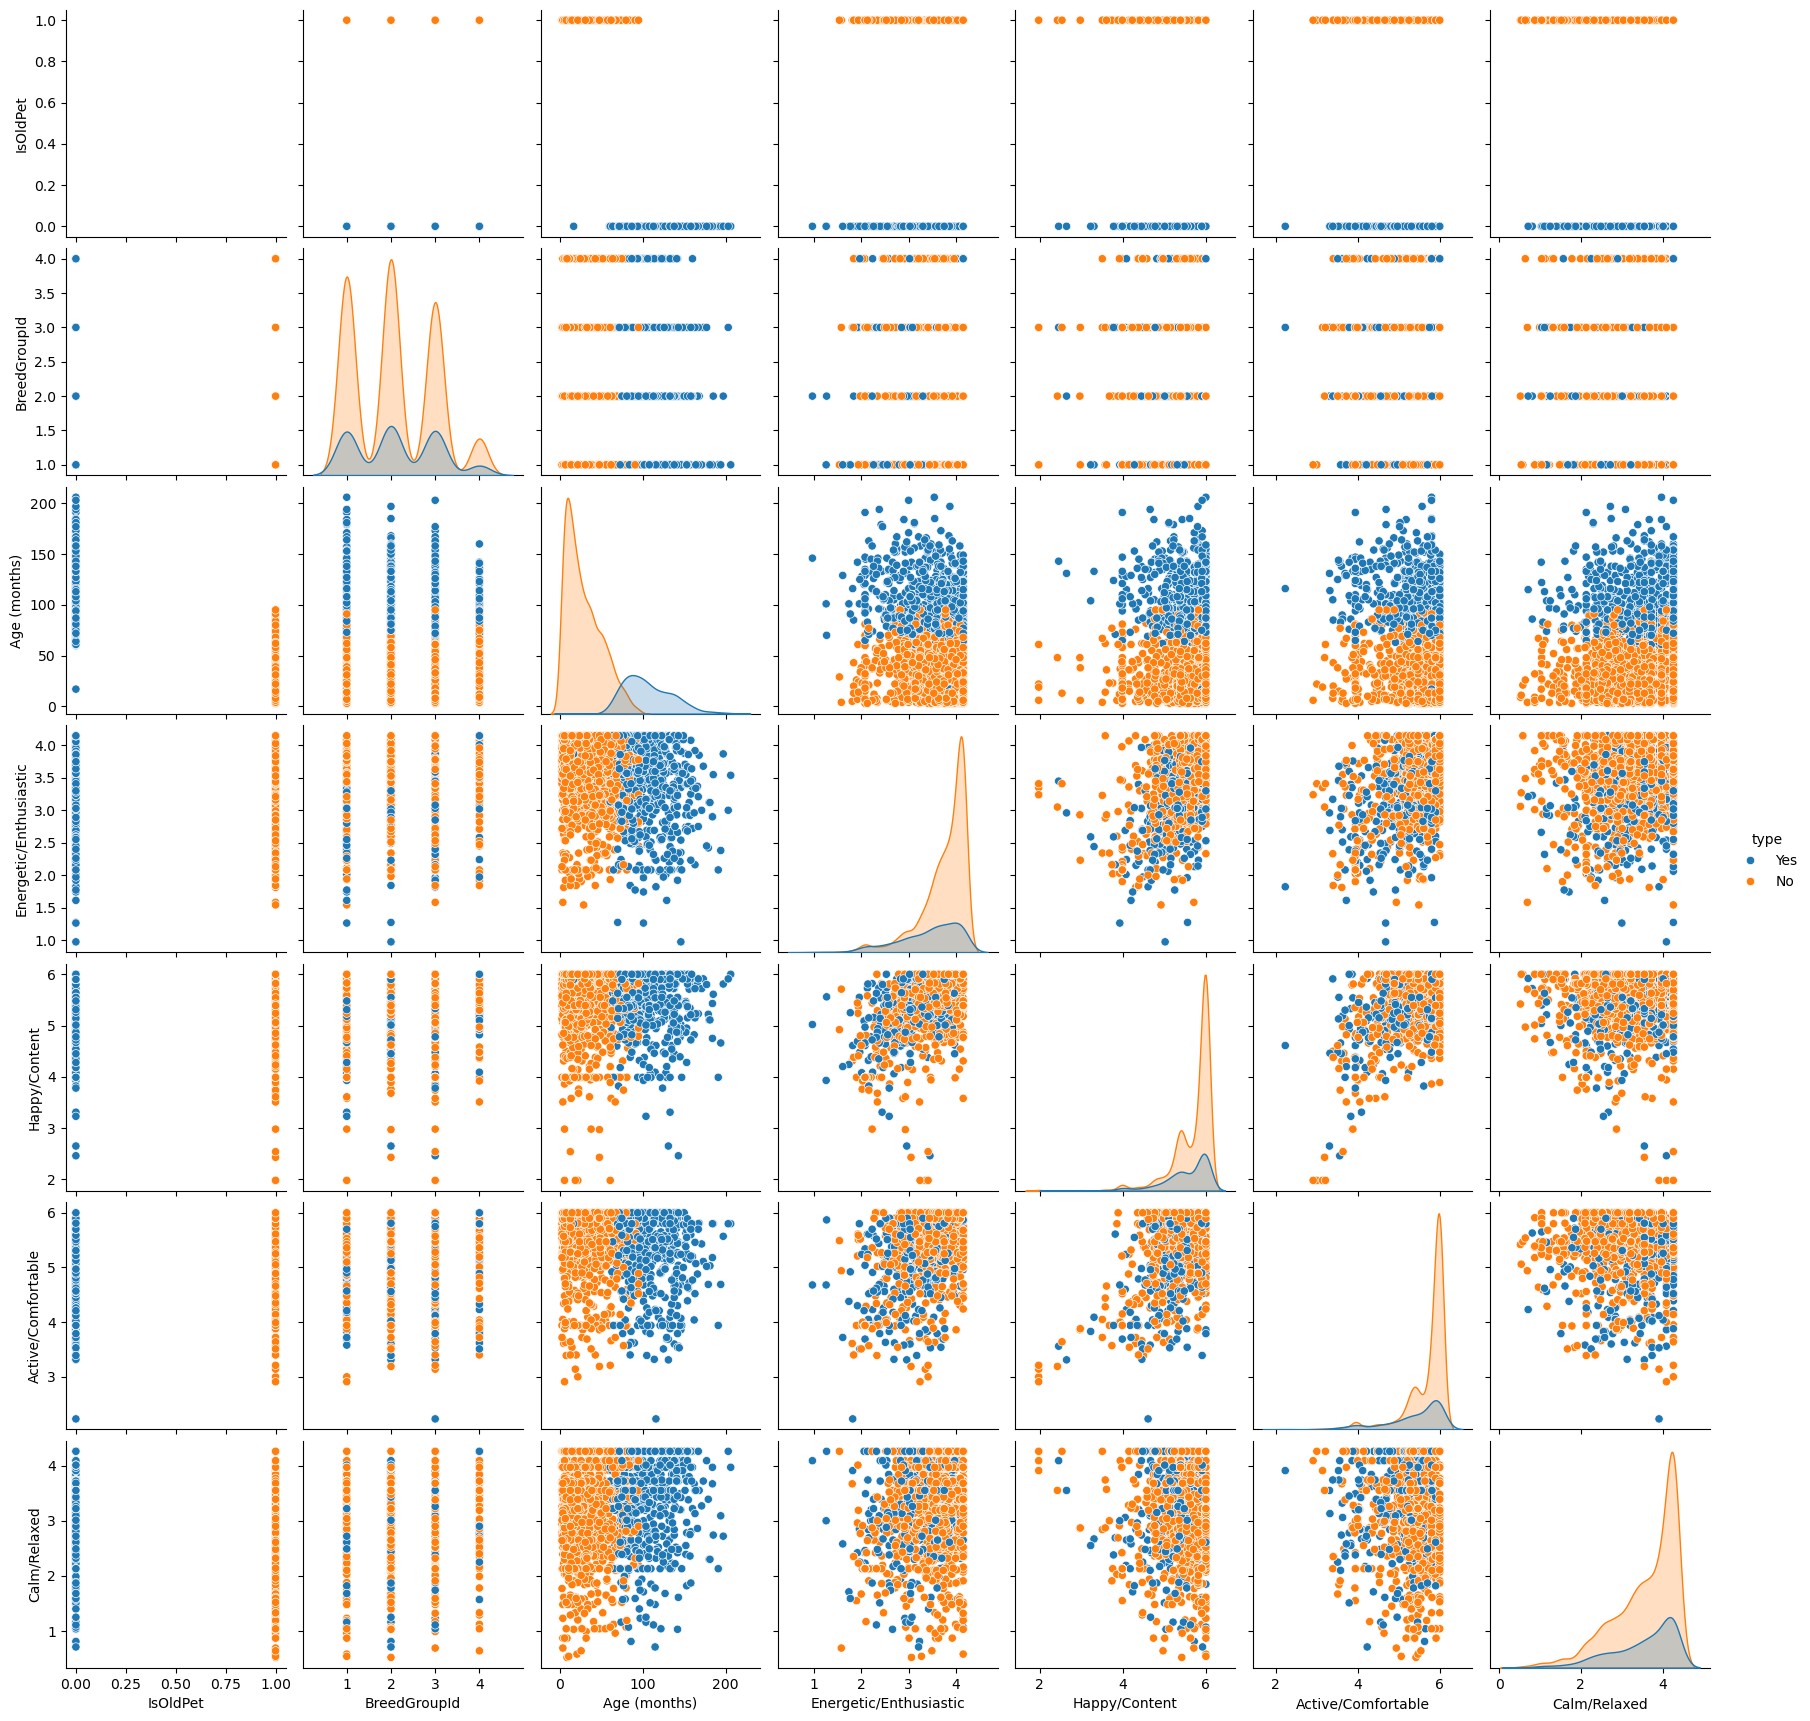

In [6]:
dog_df = pd.concat([y_train, pd.DataFrame(X_train, columns = feats)], axis = 1) # To pick best feats for this model
dog_df['type'] = pd.DataFrame(data = y_train) 
label_dict = {0: 'Yes', 1: 'No'} 
dog_df['type'] = dog_df.type.map(label_dict) 
sns.pairplot(dog_df, hue = "type") 
plt.show()

### Reprocess

In [9]:
dogs = pd.read_excel("Healthy_Dog_Vet_Reports.xlsx") # Resetting scaling for new dataframe, and ignoring preprocessing to keep features clean at this time
X = dogs[["Energetic/Enthusiastic", "Calm/Relaxed"]]
y = dogs["IsOldPet"].astype(str).str.upper().map({"TRUE": 0, "FALSE": 1})
feats = X_train.columns

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### SVM with Sklearn:

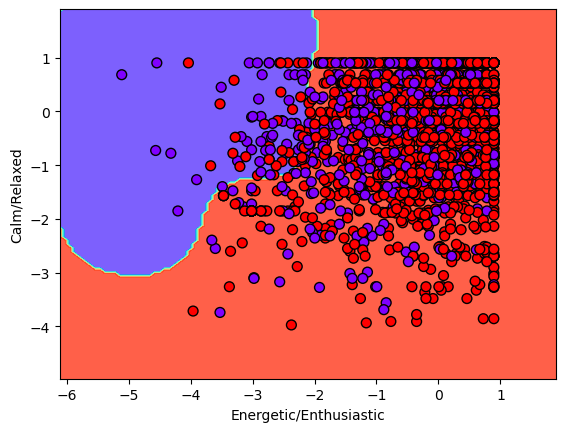

In [11]:
svm_model = svm.SVC(kernel = 'rbf', C = 2)
svm_model.fit(X_scaled, y)

DecisionBoundaryDisplay.from_estimator(svm_model, X_scaled, response_method = "predict", cmap = plt.cm.rainbow, alpha = 0.8)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = y, cmap = plt.cm.rainbow, s = 50, edgecolors = "k")

plt.xlabel("Energetic/Enthusiastic")
plt.ylabel("Calm/Relaxed")
plt.show()